# Working with Time Series

## Dates and Times in Python

### Native Python dates and times: `datetime` and `dateutil`

You can use both modules to quickly perform numerous of useful functionalities

In [1]:
from datetime import datetime
datetime(year=2021, month=5, day=26)

datetime.datetime(2021, 5, 26, 0, 0)

Or, using the dateutil module, you can parse dates from a variety of string formats:

In [2]:
from dateutil import parser
date = parser.parse('4th of july, 2021')
date

datetime.datetime(2021, 7, 4, 0, 0)

In [3]:
# Once you have a datetime object, yo can do things like printing the day of the week
date.strftime('%A')

'Sunday'

### NumPy's datetime64 arrays
The Numpy's datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly

In [4]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [5]:
# Once we have this date formatted, however, we can quickly do vectorized operaions on it:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

Because of the uniform type in Numpy `datetime64` arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large.

Numpy will infer the desired unit from the input, for example:

In [6]:
# here is a day-based datetime
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [7]:
# Here is a minute-based datetime
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [8]:
# You can force any desired fundamental unit using one of many format codes:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

`datetime64[ns]` can encode a useful range of modern dates with a suitably fine precision.

`datetime64` dtype addresses some of the deficiencies of the built-in Python `datetime` type.

### Dates and times in pandas: best of both worlds
Pandas builds upon all the tools just discussed to provide `Timestamp` objects, which combines the ease-of-use of datetime and dateutil with the efficient storage and vectorized interface of `numpy.datetime64`.

In [9]:
import pandas as pd
date = pd.to_datetime('4th of july, 2015')
date

Timestamp('2015-07-04 00:00:00')

In [10]:
date.strftime('%A')

'Saturday'

In [11]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series: Indexing by Time
Where the Pandas time series tools really become useful is when you begin to index data by timestamps. For example, we can construct a Series object that has time indexed data:

In [12]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [13]:
data.loc['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [14]:
data.loc['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Pandas Time Series Data Structures

This section will introduce the fundamental Pandas data structures for working with time series data:

1. For time stamps, Pandas provides the `Timestamp` type. It is essentially a replacement for Python's native datetime, based on numpy. The associated index structure is `DatetimeIndex`.
2. For time Periods, Pandas provides the `Period` type. This encodes a fixed-frequency interval `PeriodIndex`
3. For time deltas or durations, Pandas provides the `Timedelta` type. The associated index structure is `TimedeltaIndex`


In [15]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of july 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Any `DatetimeIndex` can be converted to a PeriodIndex with the to_period() function with the addition of a frequency code; here we'll use 'D' to indicate daily frequency:

In [16]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [17]:
# A TimedeltaIndex is created, for example, when a date is subtracted from another:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences: pd.date_range()

To make the creation of regular date sequences more convenient, Pandas offers a few functions for  this pupose:

* pd.date_range() for timestamps
* pd.period_range() for periods
* pd.timedelta_range() for time deltas

pd.date_range() accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates. By default, the frequency is one day:

In [18]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [19]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [20]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [21]:
# A sequence of durations increasing by an hour:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## Frequencies and Offsets
Fundamental to these Pandas time series tools is the concept of a frequency or date offset.

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

The monthly, quarterly, and annual frequrencies are all marked at the end of the specified period. By addin `s` suffix to any of these, they instead will be marked at the beginning:

| Code    | Description            || Code    | Description            |
|---------|------------------------||---------|------------------------|
| ``MS``  | Month start            ||``BMS``  | Business month start   |
| ``QS``  | Quarter start          ||``BQS``  | Business quarter start |
| ``AS``  | Year start             ||``BAS``  | Business year start    |

Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

- ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, `BQS-APR`, etc.
- ``A-JAN``, ``BA-FEB``, ``AS-MAR``, ``BAS-APR``, etc.

In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:

- ``W-SUN``, ``W-MON``, ``W-TUE``, ``W-WED``, etc.

On top of this, codes can be combined with numbers to specify other frequencies.
For example, for a frequency of 2 hours 30 minutes, we can combine the hour (``H``) and minute (``T``) codes as follows:

In [22]:
pd.timedelta_range(0, periods=9, freq='2H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

All of these short codes refer to specific instances of Pandas time series offsets, which can be found in the `pd.tseries.offsets` module. For example, we can create a business day offset directly as follows:

In [23]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## Resampling, Shifting, and Windowing

The ability to use dates and times as indices to intuitively organize and access data is an important piece of Pandas time series tools. The benefits of indexed data in general (automatic alignement during operations, intuitive data slicing and access, etc.) still apply, and Pandas provides several additional time series-specific operations.

Because Pandas was developed largely in a finance context, it includes some very specific tools for financial data. For example, `pandas-datareader` package, knows how to import financial data from a number of available sources, including Yahoo finance, and others:

In [24]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
goog.sample(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-22,245.405167,238.356583,245.330444,239.522217,10849113.0,239.522217
2011-11-10,301.843628,294.675476,301.833649,296.428925,5758303.0,296.428925
2013-05-10,438.625916,434.451569,436.020691,438.471497,3809626.0,438.471497
2009-05-13,197.454895,193.449905,196.309189,194.042679,5706911.0,194.042679
2015-03-12,554.846680,548.952820,551.994507,553.989014,1389605.0,553.989014


In [25]:
# For simplicity, we'll use just the closing price:
goog = goog['Close']

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

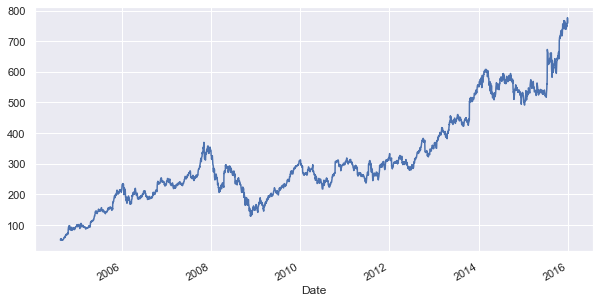

In [35]:
goog.plot(figsize=(10,5));

### Resampling and converting frequencies

One common need for time series data is resampling at a higher or lower frequency. This can be done using the `resample()` method, or the much simpler `asfreq()` method. The primary difference between the two is taht `resample()` is fundamentally a data aggregarion, while `asfreq()` is fundamentally a data selection.

Let's compare what the two return when we down-sample the data

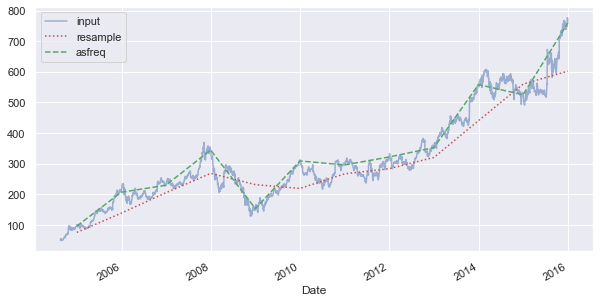

In [36]:
# Here we will resample the data at the end of business year:
goog.plot(alpha=0.5, style='-', figsize=(10,5))
# since resample is an aggregation function we need to take the average
goog.resample('BA').mean().plot(style='r:')
goog.asfreq('BA').plot(style='g--')

plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

For up-sampling, ``resample()`` and ``asfreq()`` are largely equivalent, though resample has many more options available.
In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values.
Just as with the ``pd.fillna()`` function discussed previously, ``asfreq()`` accepts a ``method`` argument to specify how values are imputed.
Here, we will resample the business day data at a daily frequency (i.e., including weekends):

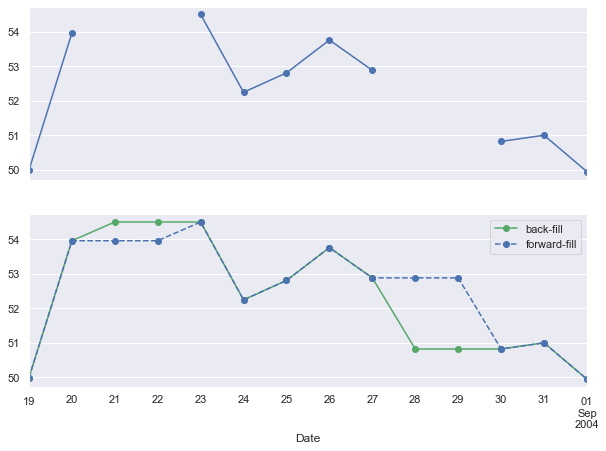

In [41]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o', figsize=(10,7))

data.asfreq('D', method='bfill').plot(ax=ax[1], style='g-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(['back-fill', 'forward-fill']);

The top panel is the default: non-business days are left as NA values and do not appear on the plot.
The bottom panel shows the differences between two strategies for filling the gaps: forward-filling and backward-filling.

### Time-Shifts

Another common time series-specific operation is shifting of data in time. Pandas has two closely related method for computing this: `shift()` and `tshift()`. In short the difference between them is that `shift()` shifts the data, while `tshift()` shifts the index. In both cases, the shift is specified in multiples of the frequency.

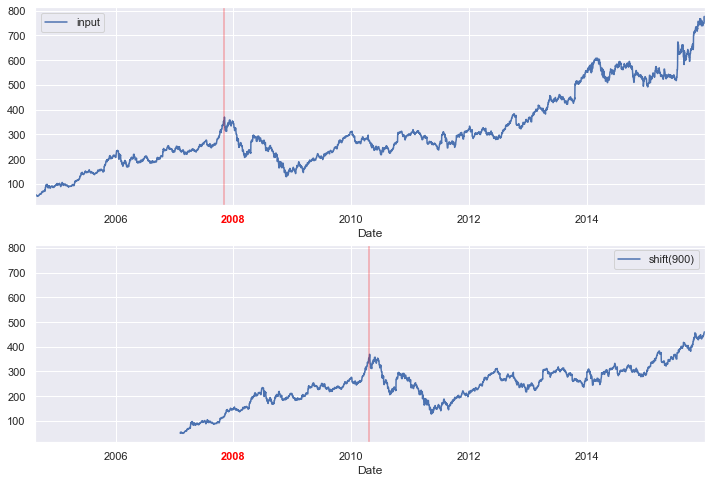

In [48]:
# here we will use only shift() to shift by 900 days:
# tshift is deprecated and will be removed
fig, ax = plt.subplots(2, sharey=True, figsize=(12,8))

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=.3, color='red')

ax[1].legend(['shift(900)'])
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red');

We see here that shift(900) shifts the data by 900 days, pushing some of it off the end of the graph (and leaving NA values at the other end).

A common context for this type of shift is in computing differences over time, like the one-year return on investment.

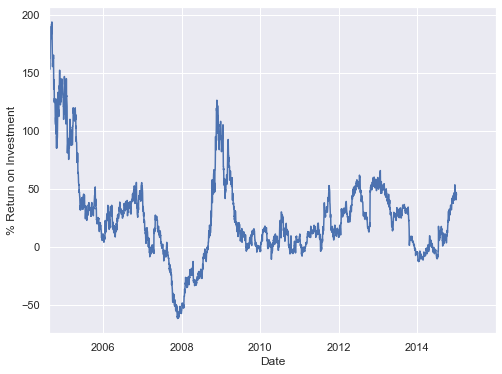

In [58]:
# the one-year return on investment for Google stock over the course of the dataset:
ROI = 100 * (goog.shift(-365) / goog - 1)
ROI.plot(figsize=(8,6))
plt.ylabel('% Return on Investment');

This helps us to see the overall trend in Google stock: thus far, the most profitable times to invest in Google have been (unsurprisingly, in retrospect) shortly after its IPO, and in the middle of the 2009 recession.

### Rolling windows

Rolling statistics are a third type of time series-specific operation implemented by Pandas. These can be accomplished via `rolling()` attribute of `Series` and `DataFrame` objects. This rolling view makes available a number of aggregation operations by default.

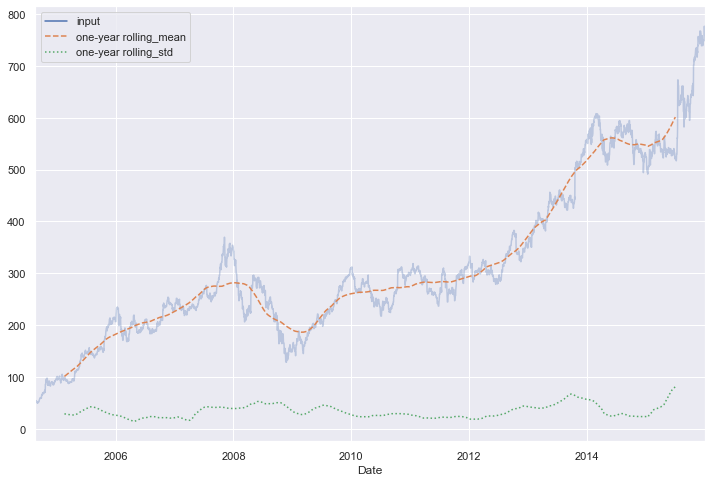

In [59]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'], figsize=(12,8))
ax.lines[0].set_alpha(0.3)